In [ ]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,10.1,0.1),'food')
service= ctrl.Antecedent(np.arange(0,10.1,0.1),'service')
tip=ctrl.Consequent(np.arange(10,25.1,0.1),'tip')


In [ ]:
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['normal']=fuzz.trimf(food.universe,[3,5,7])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['good']=fuzz.trimf(service.universe,[5,10,10])
service['normal']=fuzz.trimf(service.universe,[3,5,7])
service['poor']=fuzz.trimf(service.universe,[0,0,5])

tip['average']=fuzz.trimf(tip.universe,[13,17.5,20])
tip['small']=fuzz.trimf(tip.universe,[10,13,17.5])
tip['much']=fuzz.trimf(tip.universe,[17.5,20,25])

t


In [ ]:
food.view()
tip.view()


16.016857659831103


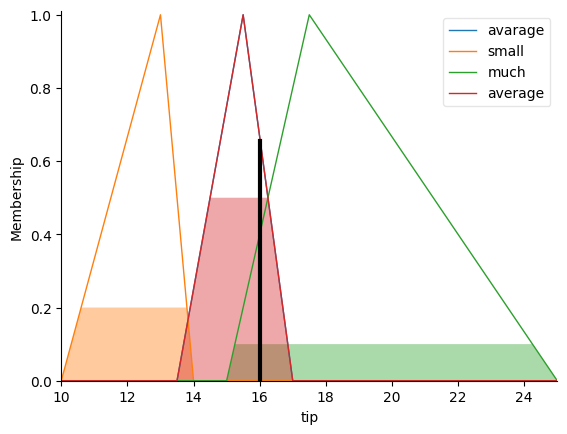

In [ ]:

rule1=ctrl.Rule(food['poor']&service['poor'],tip['small'])
rule2=ctrl.Rule(food['poor']&service['normal'],tip['small'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['small'])

rule4=ctrl.Rule(food['normal']&service['poor'],tip['small'])
rule5=ctrl.Rule(food['normal']&service['normal'],tip['average'])
rule6=ctrl.Rule(food['normal']&service['good'],tip['much'])

rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['normal'],tip['much'])
rule9=ctrl.Rule(food['good']&service['poor'],tip['much'])
tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=4
tipping.input['service']=5.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


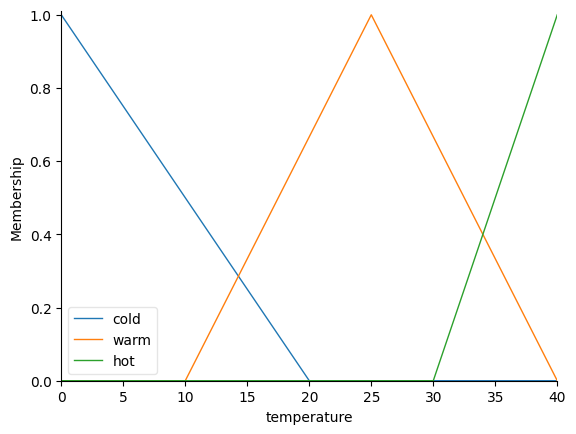

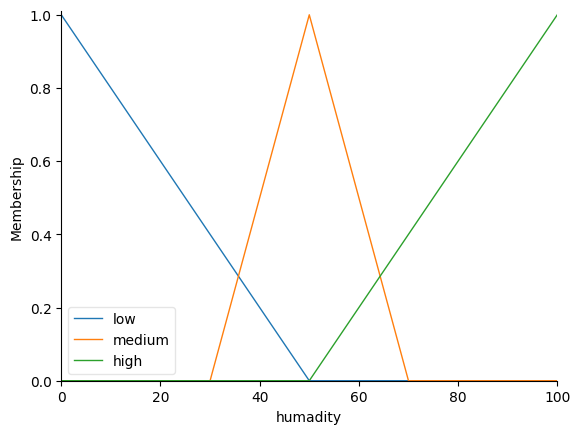

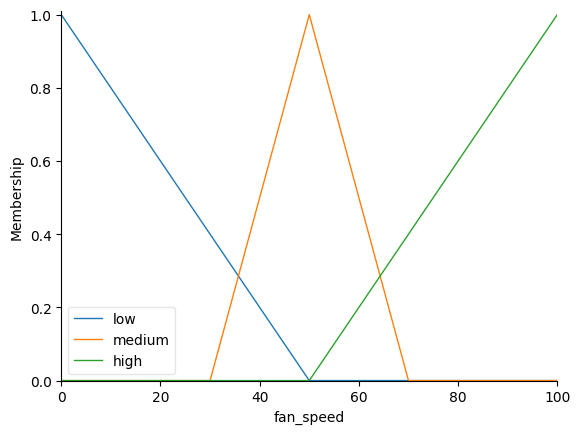

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature = ctrl.Antecedent(np.arange(0,41,1),'temperature')
humadity= ctrl.Antecedent(np.arange(0,101,1),'humadity')
fan_speed=ctrl.Consequent(np.arange(0,101,1),'fan_speed')
temperature['cold']=fuzz.trimf(temperature.universe,[0,0,20])
temperature['warm']=fuzz.trimf(temperature.universe,[10,25,40])
temperature['hot']=fuzz.trimf(temperature.universe,[30,40,40])

humadity['low']=fuzz.trimf(humadity.universe,[0,0,50])
humadity['medium']=fuzz.trimf(humadity.universe,[30,50,70])
humadity['high']=fuzz.trimf(humadity.universe,[50,100,100])

fan_speed['low']=fuzz.trimf(fan_speed.universe,[0,0,50])
fan_speed['medium']=fuzz.trimf(fan_speed.universe,[30,50,70])
fan_speed['high']=fuzz.trimf(fan_speed.universe,[50,100,100])
temperature.view()
humadity.view()
fan_speed.view()

In [ ]:
rule1=ctrl.Rule(temperature['cold']&humadity['low'],fan_speed['low'])
rule2=ctrl.Rule(temperature['cold']&humadity['medium'],fan_speed['low'])
rule3=ctrl.Rule(temperature['cold']&humadity['high'],fan_speed['medium'])

rule4=ctrl.Rule(temperature['warm']&humadity['low'],fan_speed['low'])
rule5=ctrl.Rule(temperature['warm']&humadity['medium'],fan_speed['medium'])
rule6=ctrl.Rule(temperature['warm']&humadity['high'],fan_speed['medium'])

rule7=ctrl.Rule(temperature['hot']&humadity['low'],fan_speed['medium'])
rule8=ctrl.Rule(temperature['hot']&humadity['medium'],fan_speed['high'])
rule9=ctrl.Rule(temperature['hot']&humadity['high'],fan_speed['high'])


Fan speed:50.0


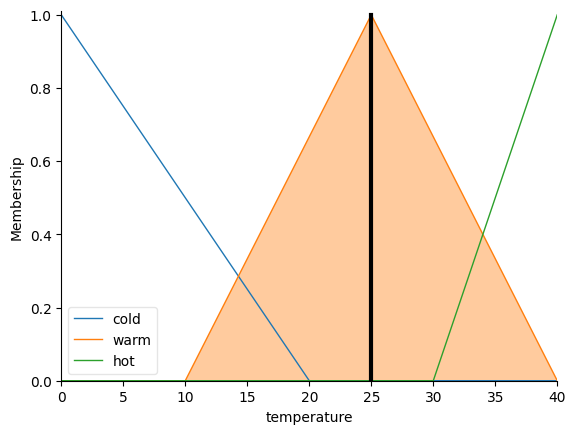

In [ ]:
fan_speed_control=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
fan_speed_simulation=ctrl.ControlSystemSimulation(fan_speed_control)
fan_speed_simulation.input['temperature']=25
fan_speed_simulation.input['humadity']=60
fan_speed_simulation.compute()
print(f"Fan speed:{fan_speed_simulation.output['fan_speed']}")
temperature.view(sim=fan_speed_simulation)



In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
traffic_condition= ctrl.Antecedent(np.arange(0,101,1),'traffic_condition')
distance= ctrl.Antecedent(np.arange(0,17,1),'distance')
weather=ctrl.Antecedent(np.arange(0,101,1),'weather')
time=ctrl.Antecedent(np.arange(0,26,1),'time')
driver_fatigue=ctrl.Antecedent(np.arange(0,101,1),'driver_fatigue')

delivery_time=ctrl.Consequent(np.arange(0,36,1),'delivery_time')
bonus=ctrl.Consequent(np.arange(0,21,1),'bonus')
rating=ctrl.Consequent(np.arange(1,6,1),'rating')


In [ ]:
traffic_condition['L']=fuzz.trimf(traffic_condition.universe,[0,0,50])
traffic_condition['M']=fuzz.trimf(traffic_condition.universe,[20,50,80])
traffic_condition['H']=fuzz.trimf(traffic_condition.universe,[50,100,100])

distance['S']=fuzz.trimf(distance.universe,[0,1,3])
distance['M']=fuzz.trimf(distance.universe,[3,5,8])
distance['L']=fuzz.trimf(distance.universe,[8,16,16])

weather['C']=fuzz.trimf(weather.universe,[0,0,50])
weather['R']=fuzz.trimf(weather.universe,[20,50,80])
weather['S']=fuzz.trimf(weather.universe,[50,100,100])

time['F']=fuzz.trimf(time.universe,[0,0,5])
time['M']=fuzz.trimf(time.universe,[5,10,15])
time['S']=fuzz.trimf(time.universe,[15,20,25])

driver_fatigue['L']=fuzz.trimf(driver_fatigue.universe,[0,0,50])
driver_fatigue['M']=fuzz.trimf(driver_fatigue.universe,[30,50,70])
driver_fatigue['H']=fuzz.trimf(driver_fatigue.universe,[50,100,100])

delivery_time['S']=fuzz.trimf(delivery_time.universe,[0,0,10])
delivery_time['M']=fuzz.trimf(delivery_time.universe,[10,17,25])
delivery_time['L']=fuzz.trimf(delivery_time.universe,[25,30,35])

bonus['L']=fuzz.trimf(bonus.universe,[0,5,10])
bonus['M']=fuzz.trimf(bonus.universe,[5,10,15])
bonus['H']=fuzz.trimf(bonus.universe,[10,15,20])

rating['P']=fuzz.trimf(rating.universe,[1,1,3])
rating['A']=fuzz.trimf(rating.universe,[2,3,4])
rating['E']=fuzz.trimf(rating.universe,[3,5,5])


In [ ]:
rule1=ctrl.Rule(traffic_condition['L']&distance['S'],delivery_time['S'])
rule2=ctrl.Rule(traffic_condition['M']&distance['M'],delivery_time['M'])
rule3=ctrl.Rule(traffic_condition['H']&distance['L'],delivery_time['L'])

rule4=ctrl.Rule(weather['C'],bonus['L'])
rule5=ctrl.Rule(weather['R'],bonus['M'])
rule6=ctrl.Rule(weather['S'],bonus['H'])

rule7=ctrl.Rule(time['F']&traffic_condition['L'],delivery_time['S'])
rule8=ctrl.Rule(time['M']&traffic_condition['M'],delivery_time['M'])
rule9=ctrl.Rule(time['S']&traffic_condition['H'],delivery_time['L'])

rule10=ctrl.Rule(driver_fatigue['L'],rating['E'])
rule11=ctrl.Rule(driver_fatigue['M'],rating['A'])
rule12=ctrl.Rule(driver_fatigue['H'],rating['P'])

rule13=ctrl.Rule(distance['L']&weather['S']&traffic_condition['H'],delivery_time['L'],bonus['H'])
rule14=ctrl.Rule(distance['S']&weather['C']&traffic_condition['L'],delivery_time['S'],bonus['L'])
rule15=ctrl.Rule(driver_fatigue['H']&traffic_condition['H'],delivery_time['L'],rating['P'])

thoi gian du kien 30.000000000000004
thuong 14.999999999999998
danh gia 1.6888888888888889


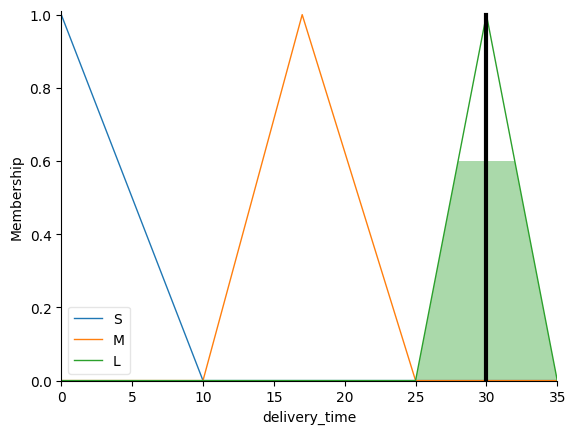

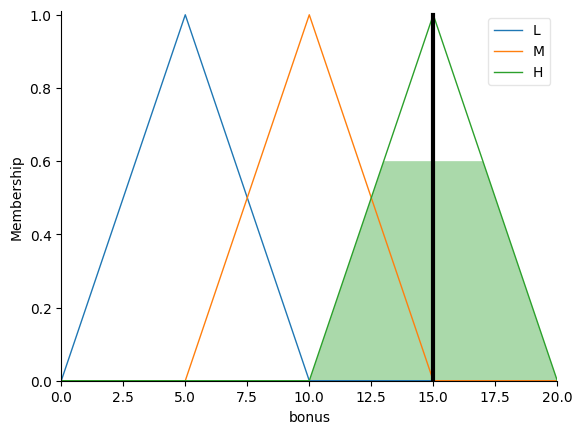

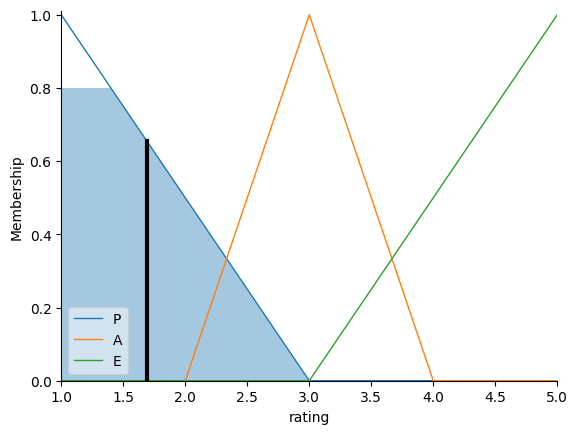

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['traffic_condition']=80
fuzzy_system.input['distance']=9
fuzzy_system.input['weather']=80
fuzzy_system.input['time']=18
fuzzy_system.input['driver_fatigue']=90
fuzzy_system.compute()
print("thoi gian du kien", fuzzy_system.output['delivery_time'])
print("thuong", fuzzy_system.output['bonus'])
print('danh gia',fuzzy_system.output['rating'])
delivery_time.view(sim=fuzzy_system)
bonus.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)
